In [8]:
ENV["Code"] = "../../Code"

for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

using CSV
using HypothesisTests
import Pandas
import Pkg
using NoLongerProblems_Pandas
using Seaborn
using DataFrames, PyPlot
using PrettyPlotting
using StatsBase
using NoLongerProblems
using NoLongerProblems_FileHandling
using PyCall
scipy = pyimport("scipy")
sns = pyimport("seaborn")
include("Functions.jl")

final_figure_rad21 (generic function with 1 method)

3.5310704891350074e-74.705509742699812e-6

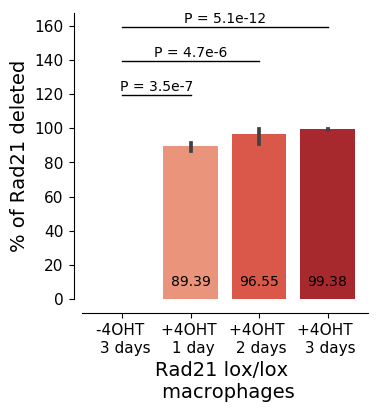

5.0904017851839646e-12

In [10]:
df = CSV.read("gqPCR_Rad21geneticdepletion_Macrophages_OTH_noOTH.csv", DataFrames.DataFrame)

rad21depletion = df
rad21depletion1 = rad21depletion[rad21depletion[!,:Rep].==1, :]
rad21depletion2 = rad21depletion[rad21depletion[!,:Rep].==2, :]
rad21depletion3 = rad21depletion[rad21depletion[!,:Rep].==3, :]

# Use the same cells with and wthout OTH as default to calculate Fold change
rad21depletion1_dd = get_deltadelta_Cq(rad21depletion1, "Rad21lox_1")
rad21depletion2_dd = get_deltadelta_Cq(rad21depletion2, "Rad21lox_2")
rad21depletion3_dd = get_deltadelta_Cq(rad21depletion3, "Rad21lox_3")
rad21depletion_dd = join_in_all_common_columns([rad21depletion1_dd, rad21depletion2_dd, rad21depletion3_dd])

figure(figsize = (4, 4))
final_figure_rad21(rad21depletion_dd, 
    col = :scc1_lox_FoldChange, 
    control = "Rad21lox",
    cs = ["blue", "yellow", "orange", "darkorange"]
)
squareplot()
savefigwithtext("genetic_Rad21_left.svg")

In [11]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] CSV v0.9.11
  [a93c6f00] DataFrames v0.22.7
  [31c24e10] Distributions v0.23.12
  [c2308a5c] FASTX v1.2.0
  [53c48c17] FixedPointNumbers v0.8.4
  [09f84164] HypothesisTests v0.10.2
  [7073ff75] IJulia v1.23.2
  [6a3955dd] ImageFiltering v0.6.21
  [6218d12a] ImageMagick v1.2.2
  [86fae568] ImageView v0.10.13
  [916415d5] Images v0.23.3
  [4138dd39] JLD v0.12.3
  [093fc24a] LightGraphs v1.3.5
  [10e44e05] MATLAB v0.8.0
  [f8716d33] MultipleTesting v0.4.1
  [eadc2687] Pandas v1.4.0
  [91a5bcdd] Plots v1.21.2
  [92933f4c] ProgressMeter v1.5.0
  [438e738f] PyCall v1.92.2
  [d330b81b] PyPlot v2.9.0
  [6f49c342] RCall v0.13.10
  [3646fa90] ScikitLearn v0.6.3
  [d2ef9438] Seaborn v0.4.1
  [2913bbd2] StatsBase v0.33.10
